# The t-Distribution <hr style="border:2.5px solid #126782"></hr>

Data Analyst: Gyro A. Madrona<br>
Department: Electrical Engineering

In [120]:
# imports and packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats

In [121]:
# load dataset
df = pd.read_csv(r"raw\transformer-voltage-10-sample.csv",
                 delimiter=",")
df

,Sample,Voltage
0,1,120.2
1,2,94.4
2,3,119.9
3,4,120.1
4,5,120.2
5,6,120.4
6,7,120.3
7,8,119.8
8,9,120.1
9,10,139.0


In [122]:
# summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sample   10 non-null     int64  
 1   Voltage  10 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 292.0 bytes


In [123]:
# summary of statistics
df.describe()

,Sample,Voltage
count,10.00000,10.000000
mean,5.50000,119.440000
std,3.02765,10.612487
min,1.00000,94.400000
25%,3.25000,119.950000
50%,5.50000,120.150000
75%,7.75000,120.275000
max,10.00000,139.000000


In [124]:
# t-critical for two-tailed test
alpha = 0.05
dof = df['Voltage'].count()-1

t_critical = stats.t.ppf(1-alpha/2,dof)
t_critical

np.float64(2.2621571628540993)

In [125]:
# confidence interval
ci_lower, ci_upper = stats.t.interval(
    confidence = 0.95,
    df = df['Voltage'].count()-1,
    loc = df['Voltage'].mean(),
    scale = df['Voltage'].std(ddof=1)/np.sqrt(df['Voltage'].count())
)

In [126]:
ci_lower

np.float64(111.8482838462108)

In [127]:
ci_upper

np.float64(127.03171615378922)

In [128]:
print("Confidence Interval = " + str(ci_lower.round(2)) + ", " + str(ci_upper.round(2)))

Confidence Interval = 111.85, 127.03


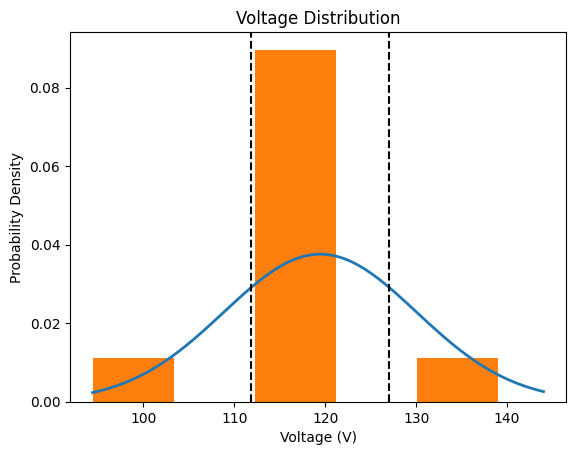

In [129]:
# voltage distribution
mean = df['Voltage'].mean()
std = df['Voltage'].std(ddof=1)

# x-axis
x_min = df['Voltage'].min()
x_max = df['Voltage'].max() + 5

# normal distribution
x = np.linspace(x_min,x_max,100)
p = stats.norm.pdf(x,mean,std)
plt.plot(x,p,linewidth=2)

# histrogram
plt.hist(df['Voltage'],bins=5,density=True)
plt.title('Voltage Distribution')
plt.ylabel('Probability Density')
plt.xlabel('Voltage (V)')

# confidence interval
plt.axvline(x=ci_lower,color='k',linestyle='--')
plt.axvline(x=ci_upper,color='k',linestyle='--')
plt.show()

## Shoe Inventory

In [130]:
df = pd.read_csv(r"raw\shoe-inventory.csv",
                 delimiter=",")
df

,Size,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,6.0,4,1,3,1,3,3,3,4,3,7,3,0
1,6.5,3,2,0,1,0,0,1,7,2,1,2,1
2,7.0,0,0,1,0,6,4,4,2,3,0,0,0
3,7.5,3,2,3,1,7,0,7,3,4,6,1,1
4,8.0,7,9,7,3,12,2,9,4,7,5,2,6
5,8.5,12,12,8,8,15,9,17,17,6,9,10,6
6,9.0,17,13,13,11,21,22,25,30,26,25,13,10
7,9.5,19,25,27,24,26,33,25,47,31,44,37,26
8,10.0,17,26,26,19,16,31,25,24,23,31,15,20
9,10.5,13,16,22,14,28,19,18,15,19,21,16,10


In [131]:
# (rows, columns)
df.shape

(17, 13)

In [132]:
# mean of size 6
mean_size_6 = df.iloc[0,1:13].mean() # exclude column index = 13
mean_size_6

np.float64(2.9166666666666665)

In [133]:
# standard deviation of size 6
std_size_6 = df.iloc[0,1:13].std()
std_size_6

np.float64(1.781640374554423)

In [134]:
# size 6 95% CI
n = df.shape[1]-1 # exclude 'Size' column

lower_6, upper_6 = stats.t.interval(
    confidence = 0.95,
    df = n-1,
    loc = mean_size_6,
    scale = std_size_6/np.sqrt(n)
)

print(lower_6)
print(upper_6)

1.7846663789548485
4.048666954378485


In [135]:
# 95% Confidence Level
mean = df.iloc[:17,1:13].mean(axis=1) # all 16 sizes
std = df.iloc[:17,1:13].std(axis=1)

df['ci_lower'], df['ci_upper'] = stats.t.interval(
    confidence = 0.95,
    df = n-1,
    loc = mean,
    scale = std/np.sqrt(n)
)

c:\Users\gyron\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2304: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\Users\gyron\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [136]:
df

,Size,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,ci_lower,ci_upper
0,6.0,4,1,3,1,3,3,3,4,3,7,3,0,1.784666,4.048667
1,6.5,3,2,0,1,0,0,1,7,2,1,2,1,0.445009,2.888324
2,7.0,0,0,1,0,6,4,4,2,3,0,0,0,0.330237,3.003096
3,7.5,3,2,3,1,7,0,7,3,4,6,1,1,1.638094,4.695240
4,8.0,7,9,7,3,12,2,9,4,7,5,2,6,4.139885,8.026782
5,8.5,12,12,8,8,15,9,17,17,6,9,10,6,8.279920,13.220080
6,9.0,17,13,13,11,21,22,25,30,26,25,13,10,14.499984,23.166683
7,9.5,19,25,27,24,26,33,25,47,31,44,37,26,24.946583,35.720084
8,10.0,17,26,26,19,16,31,25,24,23,31,15,20,19.300389,26.199611
9,10.5,13,16,22,14,28,19,18,15,19,21,16,10,14.573064,20.593603


In [137]:
# fill NAN with 0
df['ci_lower'] = df['ci_lower'].fillna(0)
df['ci_upper'] = df['ci_upper'].fillna(0)

In [138]:
# convert to int and round to 0
df['ci_lower'] = df['ci_lower'].astype(int).round()
df['ci_upper'] = df['ci_upper'].astype(int).round()

In [139]:
# recommended no. of shoe pairs by size
df[['Size','ci_upper']]

,Size,ci_upper
0,6.0,4
1,6.5,2
2,7.0,3
3,7.5,4
4,8.0,8
5,8.5,13
6,9.0,23
7,9.5,35
8,10.0,26
9,10.5,20
